# Linear Regression

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [39]:
df = pd.read_csv('./Student_Performance.csv')
print(df.head())

   Hours Studied  ...  Performance Index
0              7  ...               91.0
1              4  ...               65.0
2              8  ...               45.0
3              5  ...               36.0
4              7  ...               66.0

[5 rows x 6 columns]


In [40]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

127
0


In [41]:
print(df.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [ ]:
df.columns


Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [47]:
dff = df.rename({'Hours Studied': 'studing_hrs','Previous Scores':'prev_Scores','Extracurricular Activity':'extra_activity','Sleep Hours':'sleep_hrs','Sample Question Papers Practiced':'sample_ques_prac','Perfomance index':'performance_index'})

In [49]:
dff.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Extracurricular Activities"] = le.fit_transform(df["Extracurricular Activities"])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


Co-relatino matrics

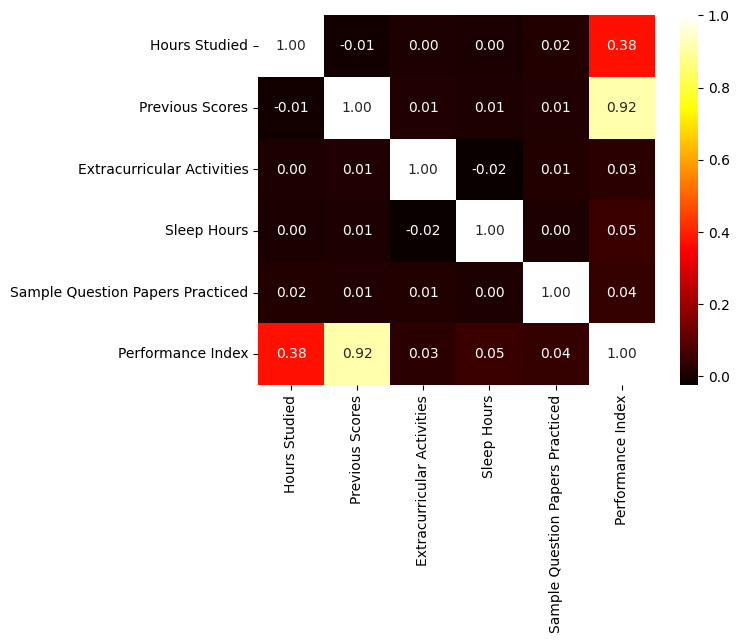

In [53]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'hot', fmt= '.2f')
plt.show()

In [60]:
df.columns
y = df['Performance Index']
x = df['Previous Scores']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(x_train.values.reshape(-1,1),y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
y_pred = lr.predict(x_test.values.reshape(-1,1))

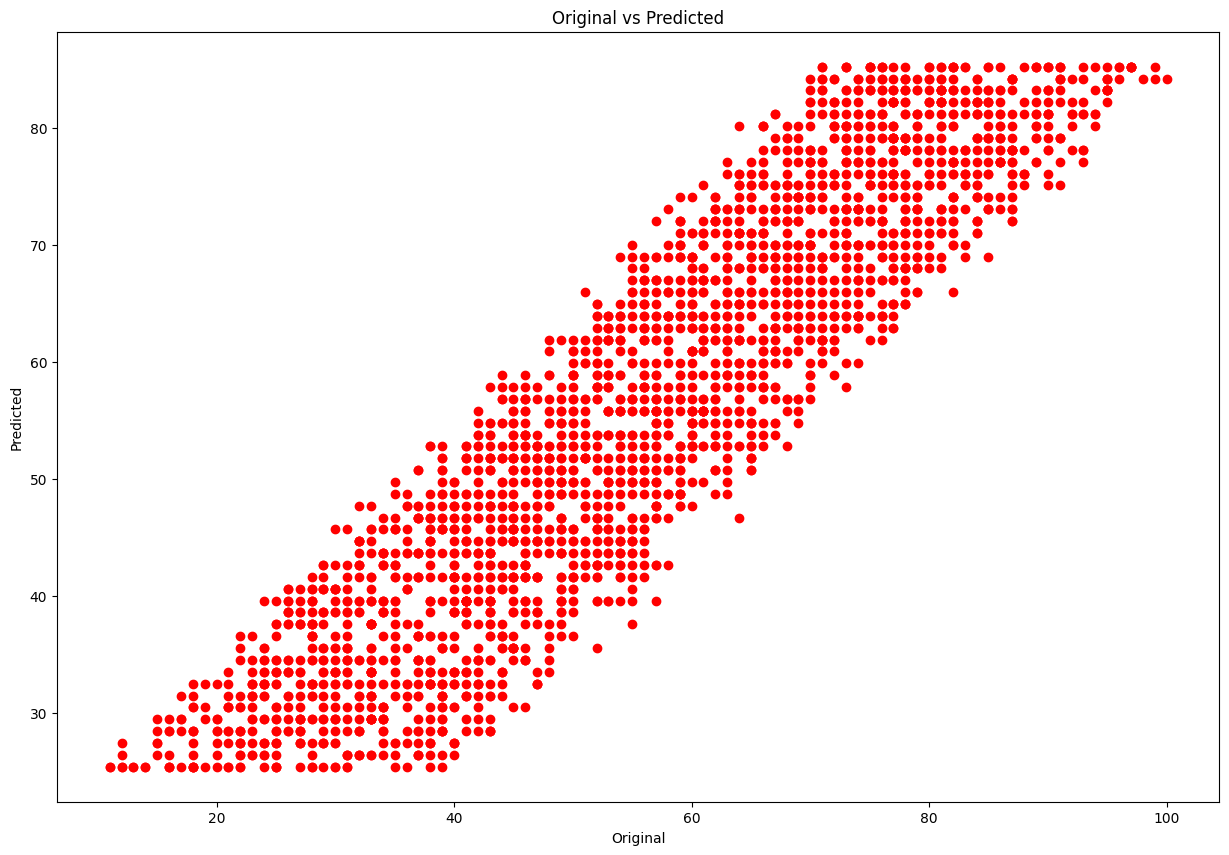

In [69]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Original vs Predicted')
plt.show()